# Telegram Channel Analysis

In [71]:
INPUT_FOLDER = './data/preprocessed_v1/'
OUTPUT_FOLDER = './data/analysis'
OUTPUT_FILE = 'analysis_v1'
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from datetime import datetime, timezone
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# make a list of all the channel files
channels = []
for filename in tqdm(os.listdir(INPUT_FOLDER), desc='channels', unit='filenames'):
    if filename.endswith('.csv'):
        channels.append(filename)
print(len(channels))

channels: 100%|██████████| 299/299 [00:00<?, ?filenames/s]

299


In [7]:
#   method to read a channel file to a dataframe
def read_channel(filename):
    dtype_dict = {'id': 'int64', 'views': 'float64', 'message': 'str', 'to_id': 'uint64', \
                  'fwd_from_id': 'str', \
                  'fwd_mes_id': 'str'
                  }
    df = pd.read_csv(os.path.join(INPUT_FOLDER, filename), index_col='Unnamed: 0', dtype=dtype_dict,
                     parse_dates=['date'])
    # Check if 'fwd_date' column exists in the DataFrame
    if 'fwd_date' in df.columns:
        df['fwd_date'] = pd.to_datetime(df['fwd_date'])  # Parse 'fwd_date' as datetime

    if 'fwd_from_id' in df.columns:
        df['fwd_from_id'] = df['fwd_from_id'].astype('UInt64')  # Convert 'fwd_from_id' to int64

    if 'fwd_mes_id' in df.columns:
        df['fwd_mes_id'] = df['fwd_mes_id'].astype('UInt64')
    # df['handle'] = filename[:-4]
    return df


In [8]:
df = read_channel(channels[0])
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,❤,👍,👎,👏,💩,🔥,😁,😢,🤔,🤮
0,2022-12-19 13:05:23+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12602,🇵🇰🇦🇫 Исламабад сделал ставку на афганских тали...,1261603870,photo,...,NaN,7.0,NaN,NaN,NaN,1.0,1.0,NaN,24.0,1.0
1,2022-12-19 09:52:21+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12601,"🕯️ 6 лет назад, 19 декабря 2016 года, в резуль...",1261603870,photo,...,27.0,17.0,NaN,14.0,NaN,6.0,22.0,196.0,19.0,14.0
2,2022-12-19 09:18:53+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12600,🇮🇷🇷🇺 Глава МИД Ирана Хосейн Амир Абдоллахиян с...,1261603870,photo,...,7.0,2.0,NaN,6.0,NaN,55.0,NaN,NaN,3.0,2.0
3,2022-12-19 08:32:39+00:00,NaN,2022-12-17 09:14:40,1760202057,4423,Abbasdjuma,12599,Наши Друзья открыли \nсбор для одного из Доне...,1261603870,photo,...,50.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,2022-12-18 21:41:25+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12598,"🇷🇺 Сегодня, 19 декабря в России празднуют День...",1261603870,photo,...,40.0,258.0,NaN,7.0,NaN,24.0,NaN,NaN,NaN,4.0


Text(0.5, 1.0, 'Views over time')

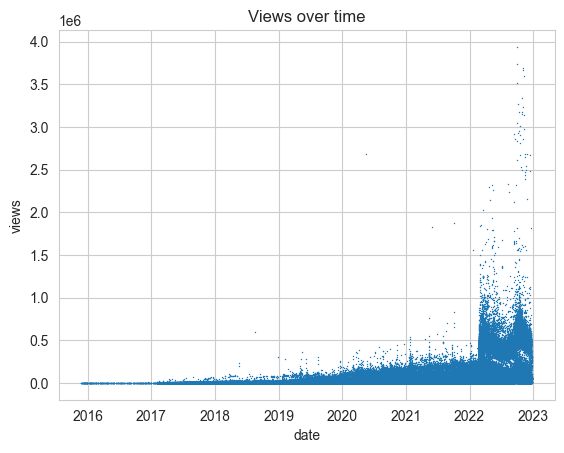

In [128]:
ax = sns.scatterplot(x='date', y='views', data=df, s=1, linewidth=0)
ax.set_title('Views over time')

In [20]:
df['hour'] = df['date'].dt.hour
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,👍,👎,👏,💩,🔥,😁,😢,🤔,🤮,hour
0,2022-12-19 13:05:23+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12602,🇵🇰🇦🇫 Исламабад сделал ставку на афганских тали...,1261603870,photo,...,7.0,NaN,NaN,NaN,1.0,1.0,NaN,24.0,1.0,13
1,2022-12-19 09:52:21+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12601,"🕯️ 6 лет назад, 19 декабря 2016 года, в резуль...",1261603870,photo,...,17.0,NaN,14.0,NaN,6.0,22.0,196.0,19.0,14.0,9
2,2022-12-19 09:18:53+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12600,🇮🇷🇷🇺 Глава МИД Ирана Хосейн Амир Абдоллахиян с...,1261603870,photo,...,2.0,NaN,6.0,NaN,55.0,NaN,NaN,3.0,2.0,9
3,2022-12-19 08:32:39+00:00,NaN,2022-12-17 09:14:40,1760202057,4423,Abbasdjuma,12599,Наши Друзья открыли \nсбор для одного из Доне...,1261603870,photo,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8
4,2022-12-18 21:41:25+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12598,"🇷🇺 Сегодня, 19 декабря в России празднуют День...",1261603870,photo,...,258.0,NaN,7.0,NaN,24.0,NaN,NaN,NaN,4.0,21


In [40]:
import time

In [45]:
df['time'] = df['date'].dt.time
df['time'] = df['time'].apply(lambda x: (x.hour * 3600) + (x.minute * 60) + x.second)

Text(0.5, 1.0, 'Distribution of messages over the day')

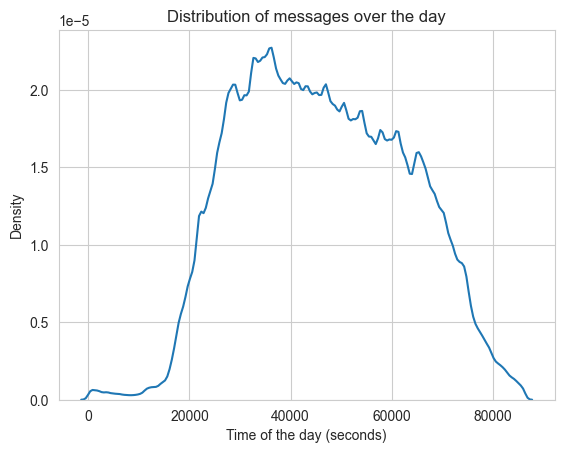

In [119]:
ax = sns.kdeplot(x='time', data=df, bw_adjust=0.4)
ax.set_xlabel('Time of the day (seconds)')
ax.set_title('Distribution of messages over the day')

In [62]:
df.columns

Index(['date', 'duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle',
       'id', 'message', 'to_id', 'type', 'views', '❤', '👍', '👎', '👏', '💩', '🔥',
       '😁', '😢', '🤔', '🤮', 'hour', 'time'],
      dtype='object')

In [63]:
dfs = [read_channel(channel) for channel in tqdm(channels[:20], desc='channels', unit='filenames')]

channels: 100%|██████████| 20/20 [00:13<00:00,  1.50filenames/s]


In [67]:
for df in dfs:
    df['time'] = df['date'].dt.time
    df['time'] = df['time'].apply(lambda x: (x.hour * 3600) + (x.minute * 60) + x.second)

Text(0.5, 1.0, 'Distribution of messages over the day')

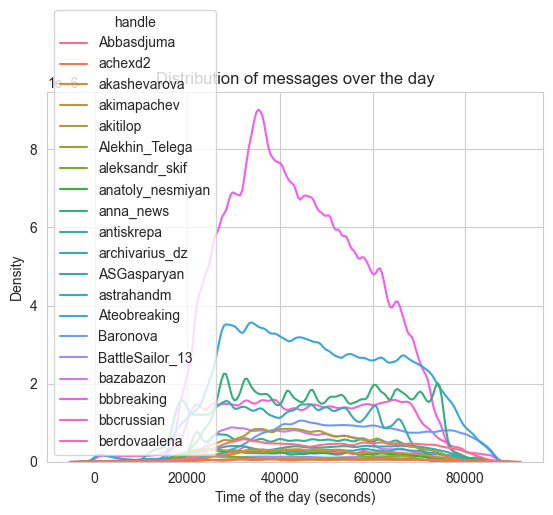

In [68]:
ax = sns.kdeplot(x='time', data=pd.concat(dfs, ignore_index=True), bw_adjust=0.4, hue = 'handle')
ax.set_xlabel('Time of the day (seconds)')
ax.set_title('Distribution of messages over the day')

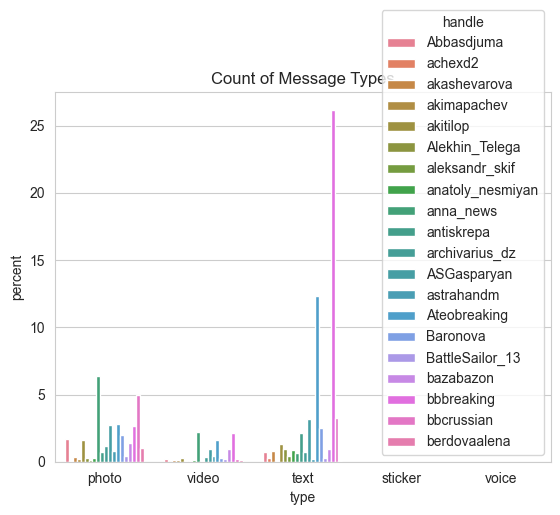

In [78]:
sns.countplot(x='type', data=pd.concat(dfs), hue='handle', stat='percent')
plt.title('Count of Message Types')
plt.show()

In [80]:
correlation_matrix = pd.concat(dfs).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Abbasdjuma'

In [ ]:
for ch in tqdm(channels[:20], desc='channels', unit='filenames'):
    df = read_channel(ch)
    for react in df.columns:


In [81]:
df = pd.concat(dfs, ignore_index=True)

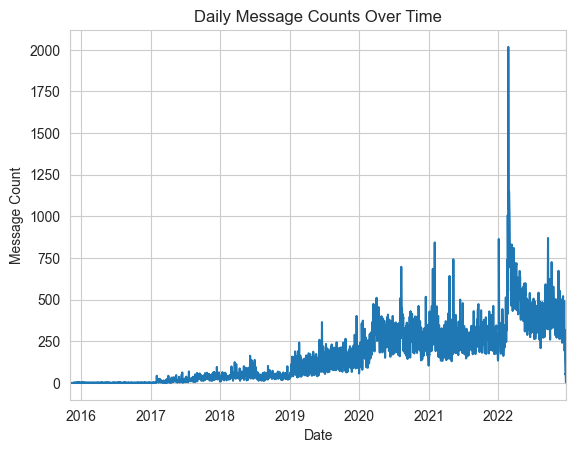

In [82]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.resample('D').size().plot()
plt.title('Daily Message Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.show()

In [ ]:
# sns.scatterplot(x='👍', y='👎', data=df, hue='handle')
# plt.title('Scatter plot of 👍 vs 👎')
# plt.show()

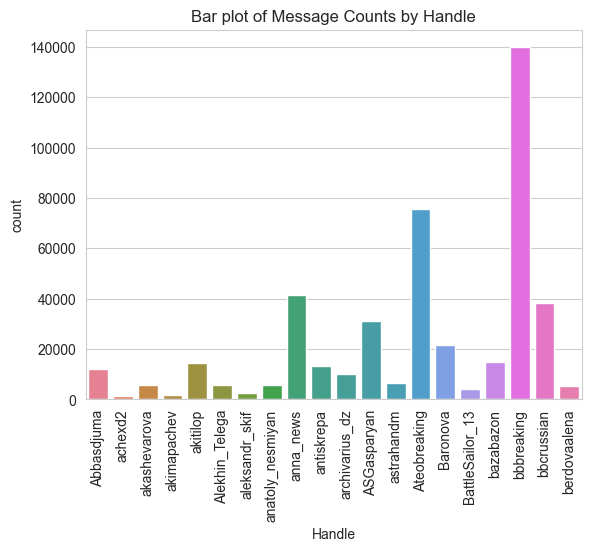

In [86]:
sns.countplot(x='handle', data=df, hue='handle')
plt.title('Bar plot of Message Counts by Handle')
plt.xlabel('Handle')
plt.xticks(rotation=90)
plt.show()

In [91]:
df.columns

Index(['duration', 'fwd_date', 'fwd_from_id', 'fwd_mes_id', 'handle', 'id',
       'message', 'to_id', 'type', 'views', '❤', '👍', '👎', '👏', '💩', '🔥', '😁',
       '😢', '🤔', '🤮', 'time', '⚡', '❤\u200d🔥', '🌚', '🌭', '🍌', '🏆', '🐳', '💔',
       '💯', '😐', '🤣', '🤨', '🤩', '🤬', '🥰', '😱', '🤯', 'frw_from_name',
       'frw_from_title', '🥴', '👌', '😒', '🙏', '🍾', '🎉', '🕊', '😍', '🤡', '🍓', '💋',
       '🖕', '😈', '🥱'],
      dtype='object')

In [ ]:
# sns.pairplot(df[['duration','❤', '👍', '👎'
#                  #, '👏', '💩', '🔥', '😁',
#        # '😢', '🤔', '🤮', '⚡', '🌚', '🌭', '🍌', '🏆', '🐳', '💔',
#        # '💯', '😐', '🤣', '🤨', '🤩', '🤬', '🥰', '😱', '🤯', '🥴', '👌', '😒', '🙏', '🍾', '🎉', '🕊', '😍', '🤡', '🍓', '💋',
#        # '🖕', '😈', '🥱'
#                  ]])
# plt.title('Pairplot of Numerical Columns')
# plt.show()

In [97]:
df.shape

(451615, 54)

In [102]:
df.head()

,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,views,...,🍾,🎉,🕊,😍,🤡,🍓,💋,🖕,😈,🥱
date,,,,,,,,,,,,,,,,,,,,,
2022-12-19 13:05:23+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12602,🇵🇰🇦🇫 Исламабад сделал ставку на афганских тали...,1261603870,photo,3645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-19 09:52:21+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12601,"🕯️ 6 лет назад, 19 декабря 2016 года, в резуль...",1261603870,photo,5831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-19 09:18:53+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12600,🇮🇷🇷🇺 Глава МИД Ирана Хосейн Амир Абдоллахиян с...,1261603870,photo,3944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-19 08:32:39+00:00,NaN,2022-12-17 09:14:40,1760202057,4423,Abbasdjuma,12599,Наши Друзья открыли \nсбор для одного из Доне...,1261603870,photo,2970.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-18 21:41:25+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12598,"🇷🇺 Сегодня, 19 декабря в России празднуют День...",1261603870,photo,4993.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sns.violinplot(x='type', y='duration', data=df, hue='handle', split=True)
# plt.title('Violin plot of Message Durations by Type')
# plt.xlabel('Message Type')
# plt.ylabel('Duration')
# plt.show()

C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\IvarY\University\CSS\final_project\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


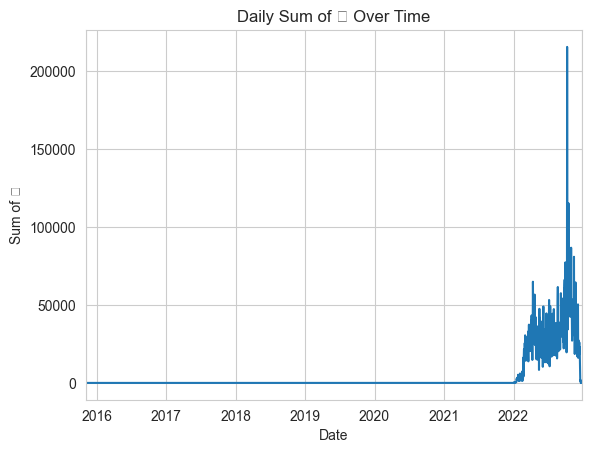

In [99]:
df.resample('D')['🔥'].sum().plot()
plt.title('Daily Sum of 🔥 Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of 🔥')
lt.show()

In [ ]:
# # Resample on a daily frequency, summing up the '🔥' column
# resampled_df = df.resample('D', on='date')['🔥'].sum()
#
# # Plotting using matplotlib
# plt.figure(figsize=(10, 6))
# resampled_df.plot(kind='bar', color='blue', alpha=0.7)
#
#
# import seaborn as sns
# sns.barplot(x=resampled_df.index, y=resampled_df.values, hue=df['handle'])
#
# plt.title('Daily Sum of 🔥 with Hue by "handle"')
# plt.xlabel('Date')
# plt.ylabel('Sum of 🔥')
# plt.show()


In [104]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,date,duration,fwd_date,fwd_from_id,fwd_mes_id,handle,id,message,to_id,type,...,🍾,🎉,🕊,😍,🤡,🍓,💋,🖕,😈,🥱
0,2022-12-19 13:05:23+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12602,🇵🇰🇦🇫 Исламабад сделал ставку на афганских тали...,1261603870,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-19 09:52:21+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12601,"🕯️ 6 лет назад, 19 декабря 2016 года, в резуль...",1261603870,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-19 09:18:53+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12600,🇮🇷🇷🇺 Глава МИД Ирана Хосейн Амир Абдоллахиян с...,1261603870,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-19 08:32:39+00:00,NaN,2022-12-17 09:14:40,1760202057,4423,Abbasdjuma,12599,Наши Друзья открыли \nсбор для одного из Доне...,1261603870,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-18 21:41:25+00:00,NaN,NaT,<NA>,<NA>,Abbasdjuma,12598,"🇷🇺 Сегодня, 19 декабря в России празднуют День...",1261603870,photo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


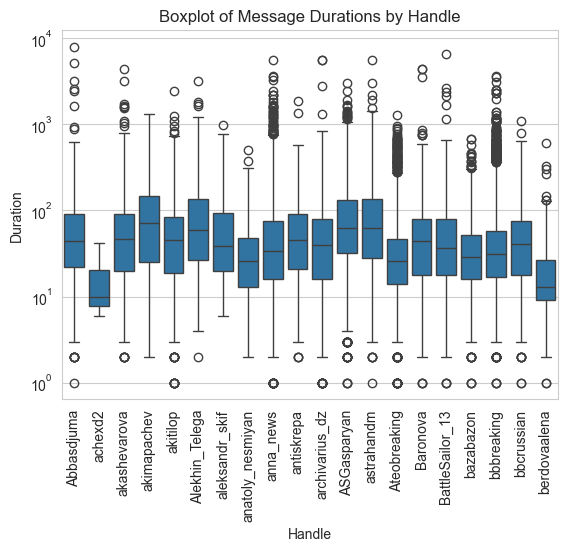

In [107]:
sns.boxplot(x='handle', y='duration', data=df, log_scale=True)
plt.title('Boxplot of Message Durations by Handle')
plt.xlabel('Handle')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.show()

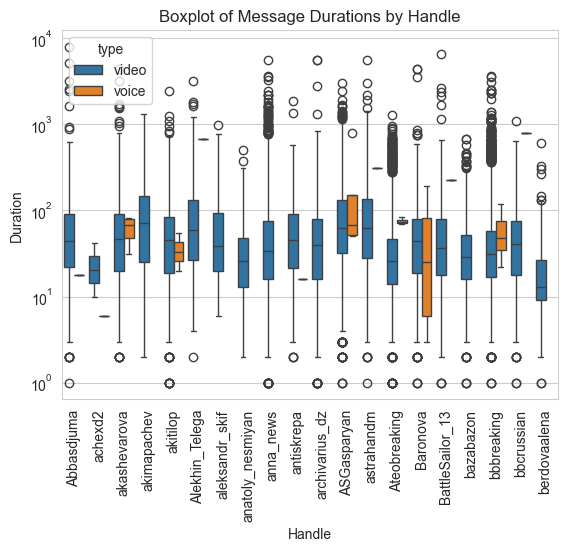

In [118]:
sns.boxplot(x='handle', y='duration', data=df.query('type == "video" | type == "voice"'), log_scale=True, hue='type')
plt.title('Boxplot of Message Durations by Handle')
plt.xlabel('Handle')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# sns.swarmplot(x='handle', y='duration', data=df)
# plt.title('Swarmplot of Message Durations by Handle')
# plt.xlabel('Handle')
# plt.ylabel('Duration')
# plt.show()

In [110]:
df['hour'] = df['date'].dt.hour

ValueError: Unknown format code 'd' for object of type 'float'

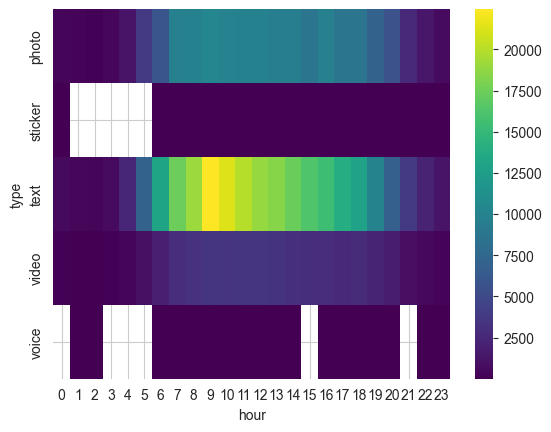

In [113]:
heatmap_data = df.groupby(['type', 'hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Message Counts by Type and Hour')
plt.xlabel('Hour')
plt.ylabel('Message Type')
plt.show()
